In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [45]:
# The plants dataset contains a listing of 34,781 plant genera and species, and the states (or provinces) in the US and Canada in which each is found.
my_cols = np.arange(70)
plants = pd.read_csv('plants.csv', names=my_cols, engine='python')
plants.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,abelia,fl,nc,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,abelia x grandiflora,fl,nc,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,abelmoschus,ct,dc,fl,hi,il,ky,la,md,mi,...,None,None,None,None,None,None,None,None,None,None
3,abelmoschus esculentus,ct,dc,fl,il,ky,la,md,mi,ms,...,None,None,None,None,None,None,None,None,None,None
4,abelmoschus moschatus,hi,pr,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [46]:
plants.describe()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
count,34781,34781,23215,18341,15387,13280,11914,10820,9961,9217,...,408,349,297,254,215,172,125,65,30,4
unique,34781,69,69,67,66,65,65,64,63,62,...,11,10,9,8,7,6,5,4,2,1
top,coccocypselum herbaceum,ca,ca,co,de,dc,ga,ga,il,in,...,on,pe,qc,sk,yt,dengl,fraspm,fraspm,fraspm,fraspm
freq,1,6695,2818,1312,945,800,669,720,713,660,...,78,72,73,73,69,45,55,34,26,4


In [47]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34781 entries, 0 to 34780
Data columns (total 70 columns):
0     34781 non-null object
1     34781 non-null object
2     23215 non-null object
3     18341 non-null object
4     15387 non-null object
5     13280 non-null object
6     11914 non-null object
7     10820 non-null object
8     9961 non-null object
9     9217 non-null object
10    8562 non-null object
11    8000 non-null object
12    7497 non-null object
13    7076 non-null object
14    6655 non-null object
15    6322 non-null object
16    6000 non-null object
17    5716 non-null object
18    5464 non-null object
19    5223 non-null object
20    4974 non-null object
21    4767 non-null object
22    4567 non-null object
23    4355 non-null object
24    4157 non-null object
25    3962 non-null object
26    3807 non-null object
27    3655 non-null object
28    3465 non-null object
29    3286 non-null object
30    3127 non-null object
31    2981 non-null object
32    2841 non-null

In [11]:
# Format the data keeping the plant name as the identifier and unpivot all the states to the row axis
p = pd.melt(plants, id_vars=[0])
p.head()

,0,variable,value
0,abelia,1,fl
1,abelia x grandiflora,1,fl
2,abelmoschus,1,ct
3,abelmoschus esculentus,1,ct
4,abelmoschus moschatus,1,hi


In [14]:
# Get a frequency table of all the states where the plant is found 
pd.crosstab(index=p[0], columns=[p['value']])

value,ab,ak,al,ar,az,bc,ca,co,ct,dc,...,tx,ut,va,vi,vt,wa,wi,wv,wy,yt
0,,,,,,,,,,,,,,,,,,,,,
abelia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abelia x grandiflora,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abelmoschus,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
abelmoschus esculentus,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
abelmoschus moschatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abies,1,1,0,0,1,1,1,1,1,0,...,0,1,1,0,1,1,1,1,1,1
abies alba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abies amabilis,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
abies balsamea,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0


In [16]:
 X = pd.crosstab(index=p[0], columns=[p['value']])

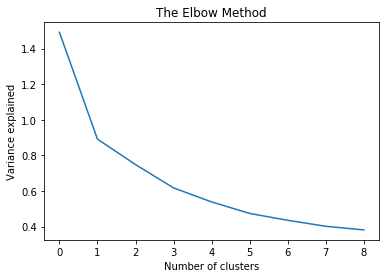

In [35]:
# Using the elbow method to find the optimal number of clusters
#plot variance for each value for 'k' between 1,10
initial = [cluster.vq.kmeans(reduced_data,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Variance explained')
plt.show()

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [31]:
# Visualize the results on PCA-reduced data
from scipy import cluster
reduced_data = PCA(n_components=2).fit_transform(X)
reduced_data
#kmeans = KMeans(n_clusters = 4, init='k-means++', random_state = 42)
#kmeans.fit(reduced_data)

array([[-0.74494137, -0.53046275],
       [-0.74494137, -0.53046275],
       [ 0.77840364, -1.54901061],
       ...,
       [-0.58894815,  0.03890238],
       [-0.58894815,  0.03890238],
       [-0.88376249, -0.13722174]])

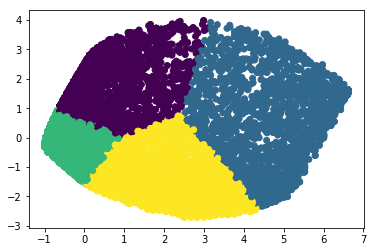

In [29]:
cent, var = initial[3]
#use vq() to get an assignment for each obs.
assignment,cdist = cluster.vq.vq(reduced_data,cent)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=assignment)
plt.show()